In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exponential_decay(x_arr, x0 = 3, E0=0.5, lambda_=0.1):
    
    y = E0 * np.exp(-lambda_ * (x_arr-x0))
    return y

def quadratic_like_exponential(x_arr, x0 = 3, a=0.0001, E0=0.5, lambda_=0.1):
    
    y_e = exponential_decay(x_arr, x0, E0, lambda_)
    yq = a * x_arr

    return y_e + yq

def straight_line(x_arr, a=0.3):
    return a*x_arr

def plot_curves(x_arr, curves: list[dict], text_length: float=16):

    plt.figure(figsize=(8, 6), dpi=100)

    for curve in curves:
        y = curve['curve']
        plt.plot(x_arr, y, color=curve['color'], label=curve['label'])

    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.tick_params(labelsize=text_length)
    plt.xlabel('Capacity ->', fontsize=text_length)
    plt.ylabel('Error (J)', fontsize=text_length)
    plt.legend(prop={'size': text_length})

    plt.xticks([])
    plt.yticks([])

    plt.grid(True)
    plt.show()

In [ ]:
x_arr = np.linspace(0, 100, 500)

generalization_error = quadratic_like_exponential(x_arr, x0 = -10, a=0.00038, E0=0.5, lambda_=0.08)
bias = exponential_decay(x_arr, x0 = -10, E0=0.5, lambda_=0.08)
variance = straight_line(x_arr, a=0.00038)

plot_curves(x_arr, [{"curve": bias, "color": "blue", "label": "Bias"}, 
                  {"curve": generalization_error, "color": "red", "label": "Generalization error"},
                  {"curve": variance, "color": "brown", "label": "Variance"}
                  ], 25)

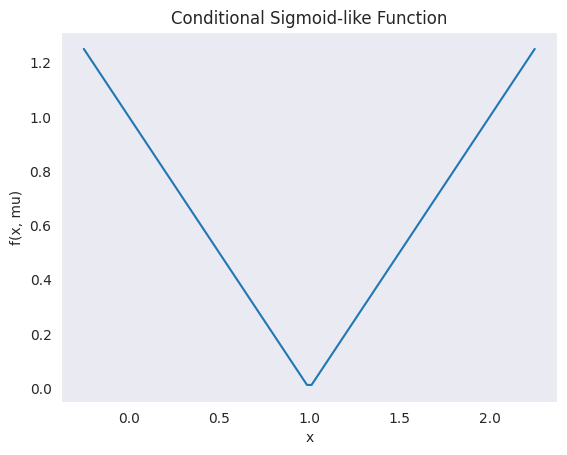

In [5]:
def inverse_gaussian_confidence(x, mean, std=0.5):
    diff = np.abs(x - mean)
    return 1 - np.exp(-(diff / std) ** 2)

def double_line(x, mean=0):
    return np.abs(x - mean)

mean = 1
std = 0.5 # = std / 2

x = np.linspace(-2.5*std+mean, 2.5*std+mean, 100)

y = double_line(x, mean)

plt.plot(x, y)
plt.title("Conditional Sigmoid-like Function")
plt.xlabel("x")
plt.ylabel("f(x, mu)")
plt.grid()
plt.show()